# 📊 Day 3 Bootcamp: Scenario-Based Data Storytelling


Welcome to your advanced **data storytelling challenge**. You will answer **practical questions** using two real-world datasets:
- 🏪 Supermarket Sales
- 🌍 COVID-19 Global Snapshot

Each question includes:
- A **realistic scenario**
- **Possible hypotheses**
- A plot to **visualize insights**
- A **discussion prompt**

---

## 🔧 Step 1: Setup and Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)


## 🏪 Dataset 1: Supermarket Sales

In [2]:
# Load and preprocess supermarket sales
url = 'https://raw.githubusercontent.com/selva86/datasets/master/supermarket_sales.csv'
df = pd.read_csv(url)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Weekday'] = df['Date'].dt.strftime('%A')
df['Sales Category'] = pd.qcut(df['Total'], q=4, labels=["Low", "Mid", "High", "Very High"])
df.head()

<ipython-input-3-de298acb15b4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour,Weekday,Sales Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,13,Saturday,Very High
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,March,Friday,10,Friday,Low
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,13,Sunday,High
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,20,Sunday,Very High
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,10,Friday,Very High


### ✅ Check for Missing Values

In [4]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


### ❓ Supermarket Q1: Which day of the week has the most sales?

**Scenario:** You're consulting a retail chain that wants to offer weekend promotions. They need insights on peak days.

**Possible Answers:**
- A. Saturday
- B. Sunday
- C. Weekdays
- D. Random

<Axes: xlabel='Day', ylabel='Total'>

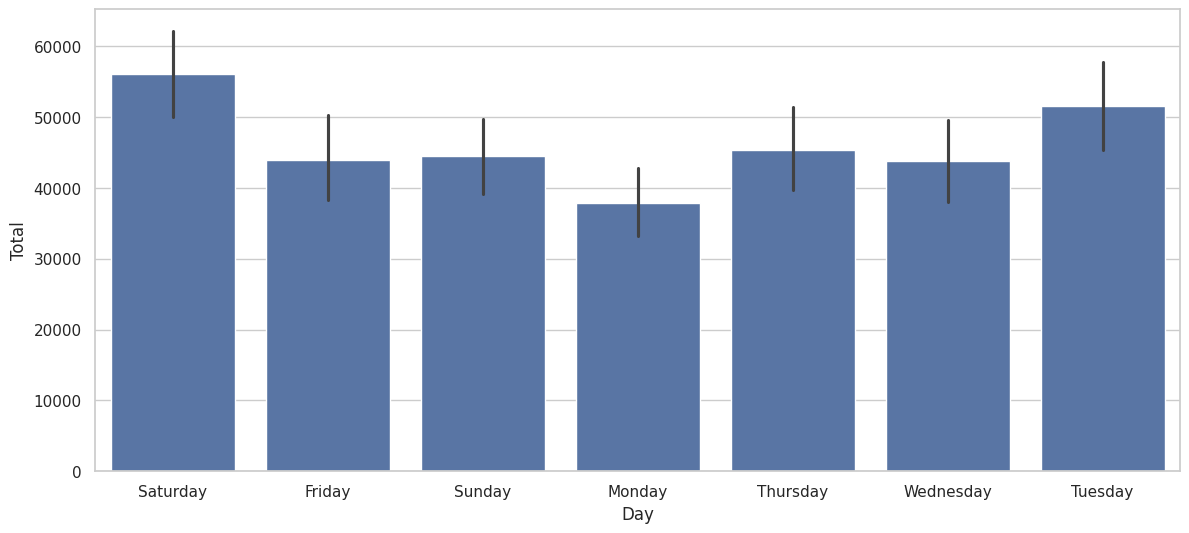

In [5]:
sns.barplot(data=df, x='Day', y='Total', estimator='sum')

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q2: What time of day do customers spend the most?

**Scenario:** Management wants to optimize staff shifts and inventory by identifying the busiest hours.

**Possible Answers:**
- A. Early Morning
- B. Afternoon
- C. Evening
- D. Night

<Axes: xlabel='Hour', ylabel='Count'>

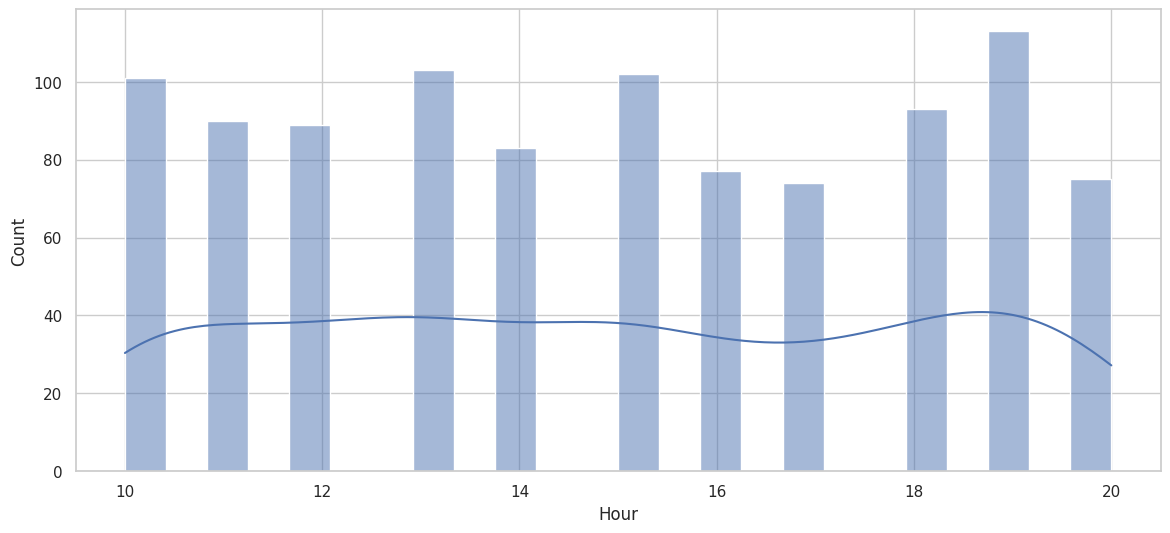

In [6]:
sns.histplot(df['Hour'], bins=24, kde=True)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q3: Are men or women spending more on average?

**Scenario:** The marketing team wants to personalize campaigns by gender.

**Possible Answers:**
- A. Males spend more
- B. Females spend more
- C. They spend equally
- D. Varies by branch

<Axes: xlabel='Gender', ylabel='Total'>

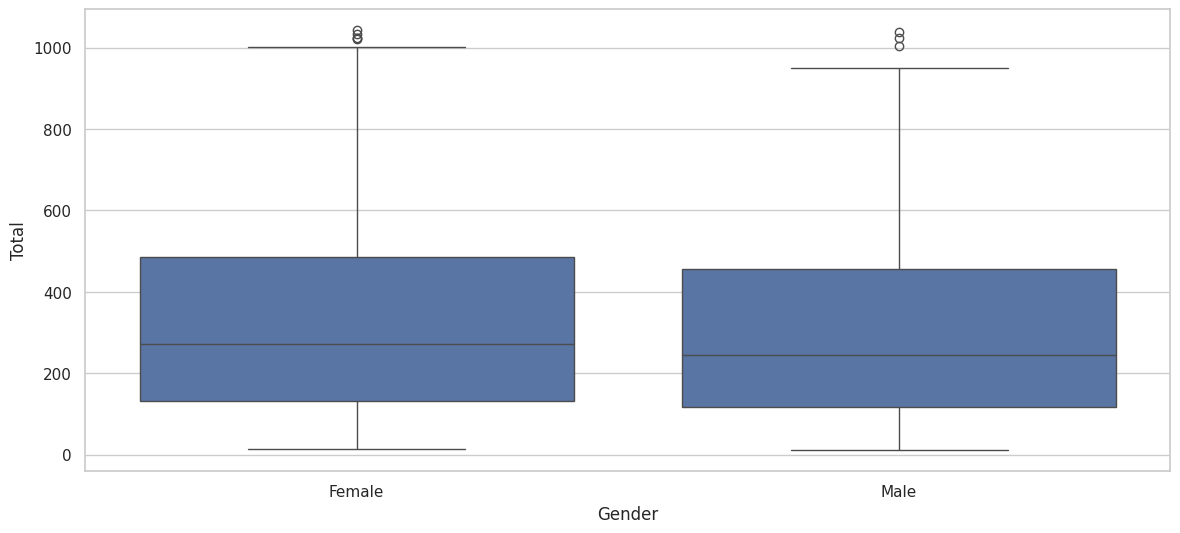

In [7]:
sns.boxplot(x='Gender', y='Total', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q4: Which product lines generate the most revenue?

**Scenario:** You are tasked with recommending which departments deserve more shelf space.

**Possible Answers:**
- A. Food and beverages
- B. Health and beauty
- C. Electronic accessories
- D. Fashion

<Axes: xlabel='Product line', ylabel='Total'>

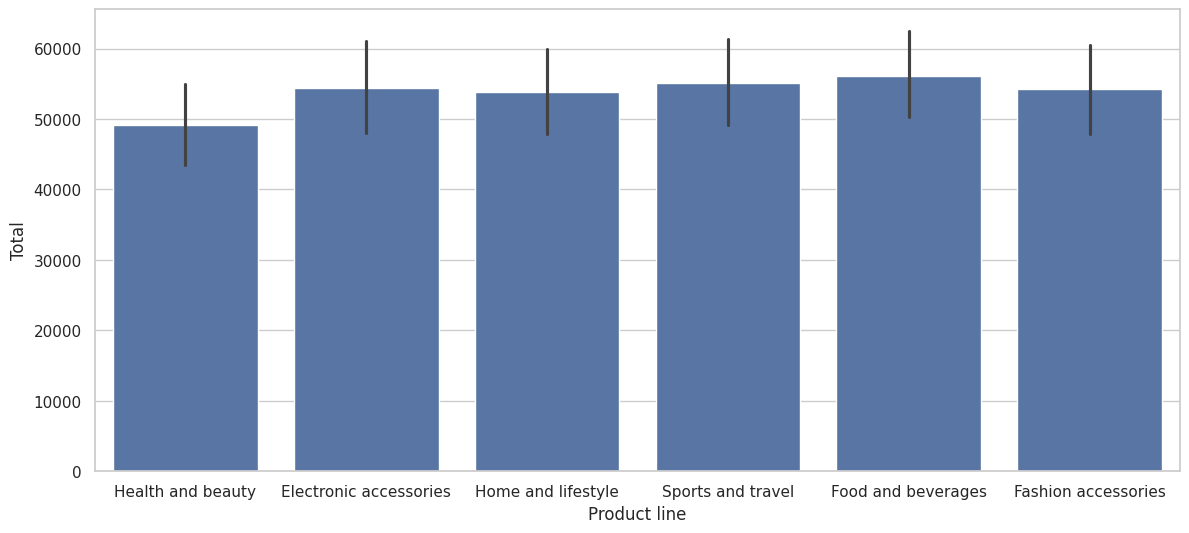

In [8]:
sns.barplot(x='Product line', y='Total', data=df, estimator='sum')

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q5: Are certain branches more profitable than others?

**Scenario:** An executive wants to know which branches outperform the rest and why.

**Possible Answers:**
- A. Branch A
- B. Branch B
- C. Branch C
- D. Similar

<Axes: xlabel='Branch', ylabel='gross income'>

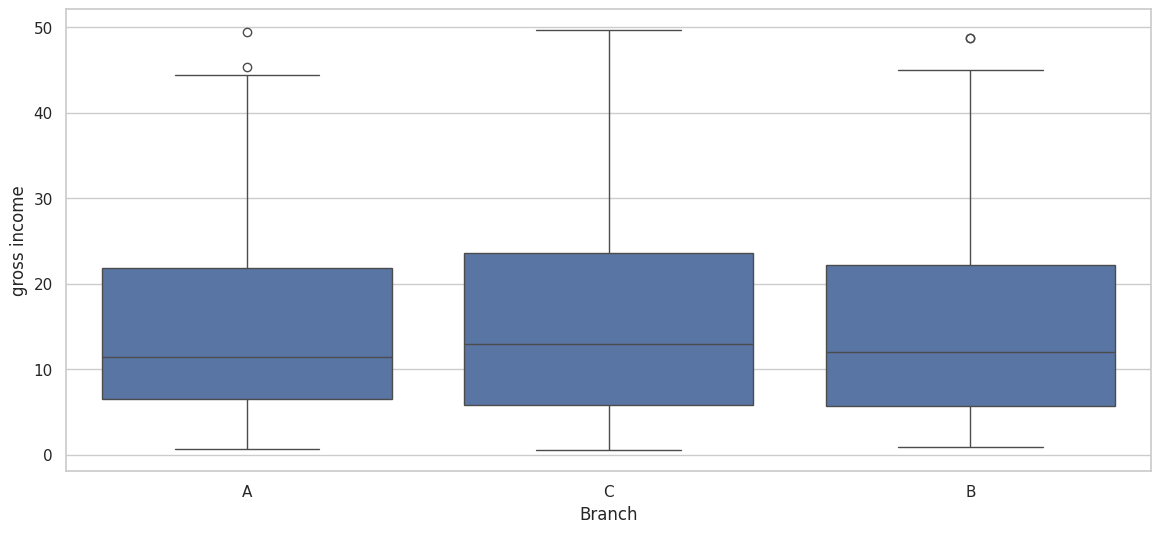

In [9]:
sns.boxplot(x='Branch', y='gross income', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q6: Is there a correlation between quantity and total sales?

**Scenario:** You're auditing the sales logic. Should increasing quantity increase sales linearly?

**Possible Answers:**
- A. Strong correlation
- B. Weak correlation
- C. Inverse
- D. No pattern

<Axes: xlabel='Quantity', ylabel='Total'>

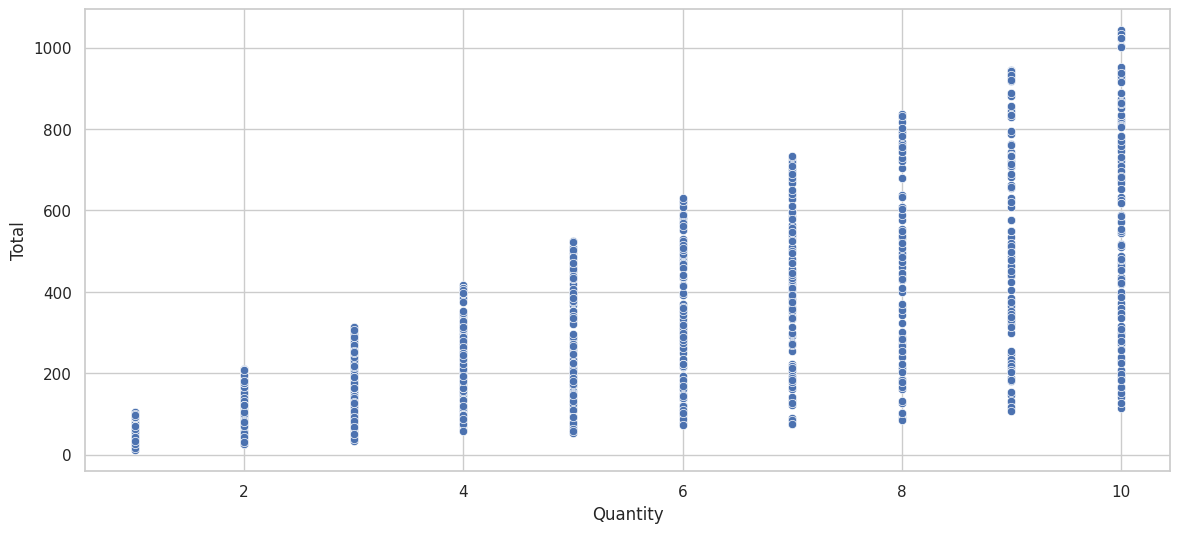

In [10]:
sns.scatterplot(x='Quantity', y='Total', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q7: Which customer type is more profitable?

**Scenario:** You're evaluating loyalty programs and want to see if 'Member' customers spend more.

**Possible Answers:**
- A. Members spend more
- B. Normal customers spend more
- C. Equal
- D. Depends on gender

<Axes: xlabel='Customer type', ylabel='Total'>

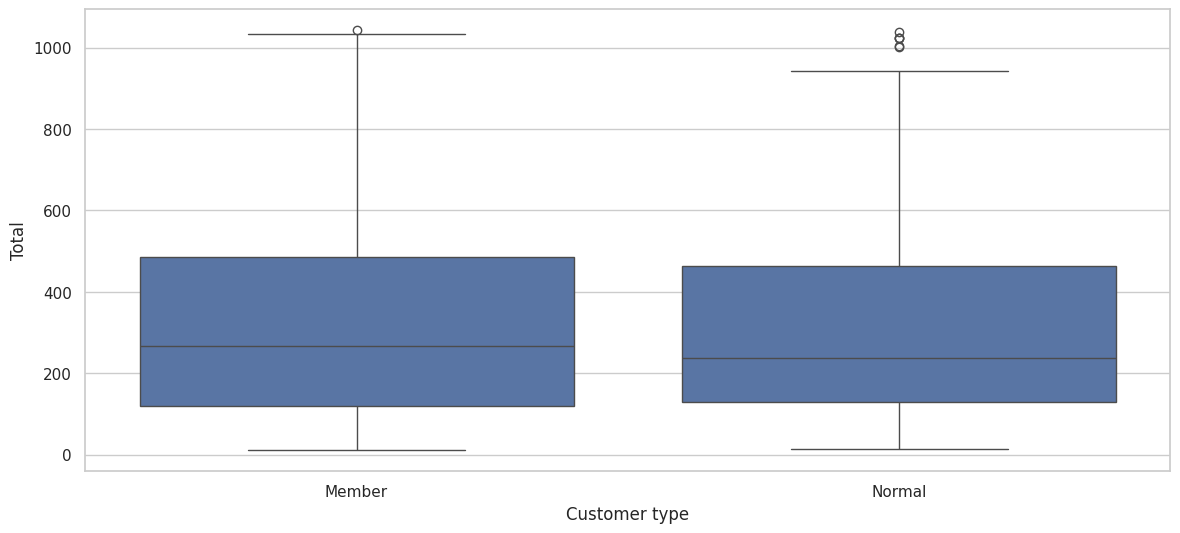

In [11]:
sns.boxplot(x='Customer type', y='Total', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q8: Do payment methods impact total purchase amount?

**Scenario:** The finance team wants to analyze if digital payments lead to bigger baskets.

**Possible Answers:**
- A. Credit card users spend more
- B. Cash spenders dominate
- C. Digital payments have higher totals
- D. No effect

<Axes: xlabel='Payment', ylabel='Total'>

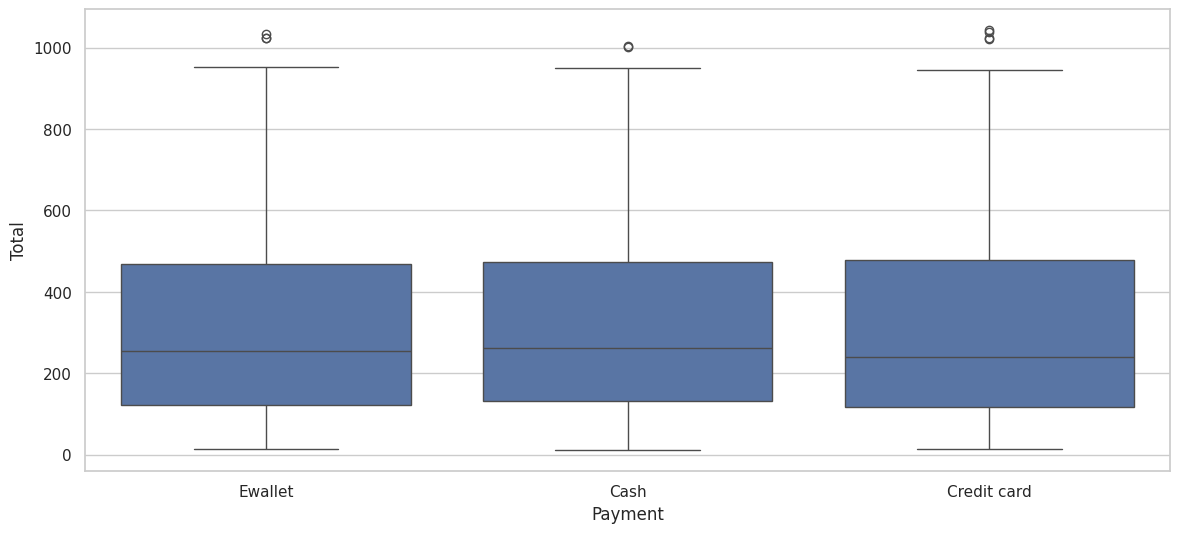

In [12]:
sns.boxplot(x='Payment', y='Total', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q9: Are there outliers in gross income?

**Scenario:** You are identifying possible errors or standout transactions in the profit column.

**Possible Answers:**
- A. Yes, many outliers
- B. A few mild ones
- C. No outliers
- D. Need boxplot to confirm

<Axes: ylabel='gross income'>

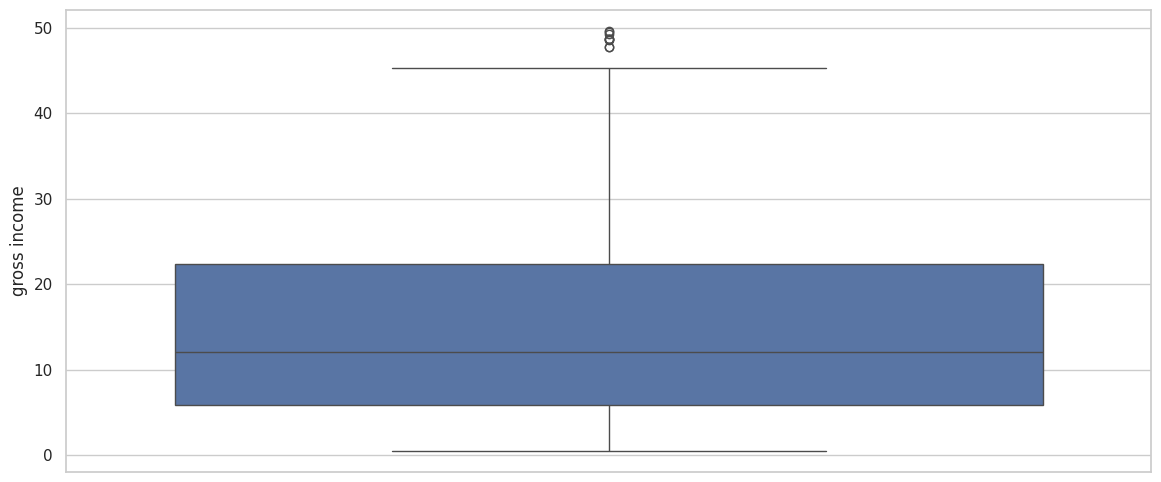

In [13]:
sns.boxplot(y='gross income', data=df)

✅ **What patterns do you see? Discuss below:**

### ❓ Supermarket Q10: Which combinations of gender and payment yield high totals?

**Scenario:** Targeted promotions are being designed based on behavior combinations.

**Possible Answers:**
- A. Male/Cash
- B. Female/E-Wallet
- C. All similar
- D. Gender has no effect

<Axes: xlabel='Gender', ylabel='Total'>

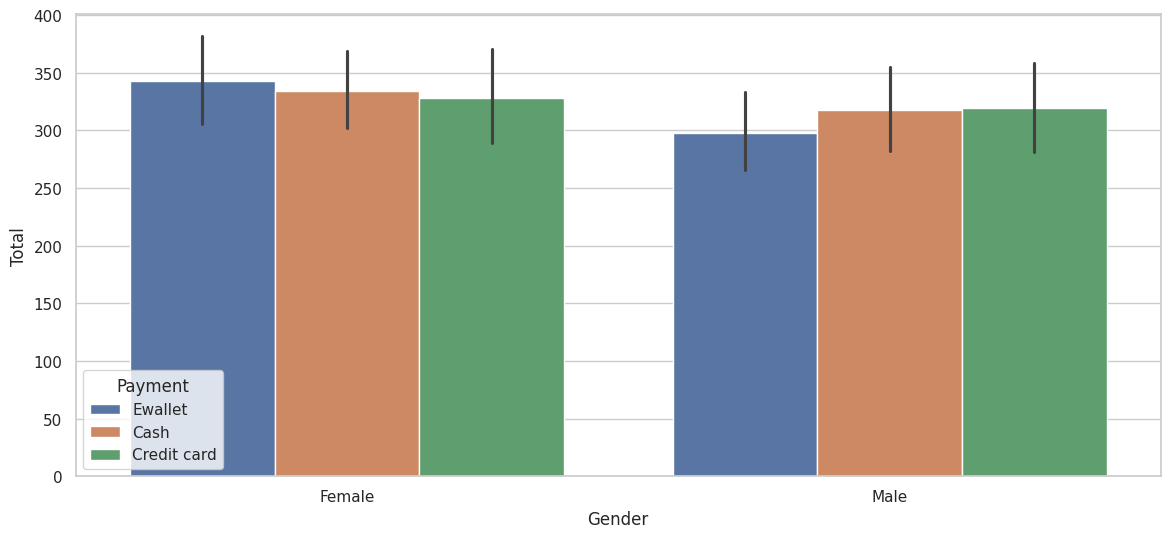

In [14]:
sns.barplot(x='Gender', y='Total', hue='Payment', data=df, estimator='mean')

✅ **What patterns do you see? Discuss below:**

## 🌍 Dataset 2: COVID-19 Global Snapshot

In [15]:
covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv'
covid = pd.read_csv(covid_url)
covid = covid[covid['continent'].notna()]
covid['case_fatality_rate'] = covid['total_deaths'] / covid['total_cases']
covid.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,case_fatality_rate
0,AFG,Asia,Afghanistan,2024-08-04,235214.0,0.0,0.000,7998.0,0.0,0.0,...,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,0.034003
2,ALB,Europe,Albania,2024-08-04,335047.0,0.0,0.000,3605.0,0.0,0.0,...,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN,0.010760
3,DZA,Africa,Algeria,2024-08-04,272139.0,18.0,2.571,6881.0,0.0,0.0,...,83.741,1.90,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN,0.025285
4,ASM,Oceania,American Samoa,2024-08-04,8359.0,0.0,0.000,34.0,0.0,0.0,...,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN,0.004067
5,AND,Europe,Andorra,2024-08-04,48015.0,0.0,0.000,159.0,0.0,0.0,...,NaN,NaN,83.73,0.868,79843.0,NaN,NaN,NaN,NaN,0.003311


### ✅ Check for Missing Values

In [16]:
covid.isnull().sum().sort_values(ascending=False).head(10)

,0
positive_rate,235
new_tests_smoothed_per_thousand,235
new_tests_smoothed,235
reproduction_rate,235
new_tests_per_thousand,235
new_tests,235
excess_mortality_cumulative_per_million,235
excess_mortality_cumulative_absolute,235
tests_per_case,235
total_tests,235


### ❓ COVID Q1: Which countries have the most COVID-19 cases?

**Scenario:** You're prioritizing international relief efforts.

**Possible Answers:**
- A. US and India
- B. Africa leads
- C. Equal everywhere
- D. Small nations

<Axes: xlabel='total_cases', ylabel='location'>

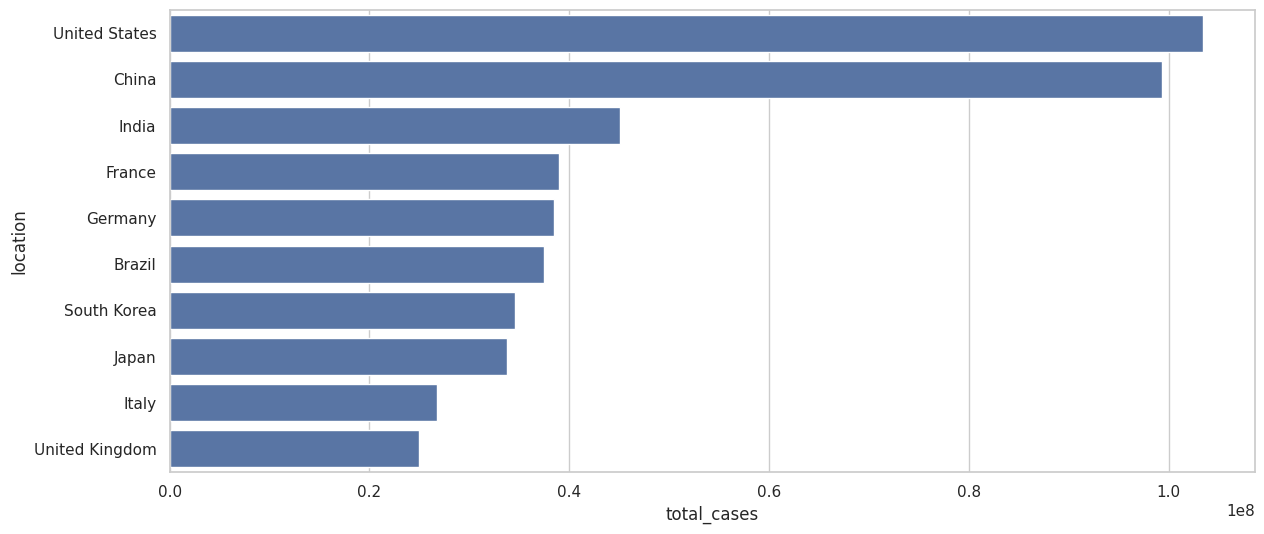

In [17]:
top = covid.sort_values('total_cases', ascending=False).head(10)
sns.barplot(x='total_cases', y='location', data=top)

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q2: Which countries have the most deaths?

**Scenario:** You're researching where COVID hit hardest.

**Possible Answers:**
- A. US, India, Brazil
- B. Africa
- C. Europe
- D. Data unknown

<Axes: xlabel='total_deaths', ylabel='location'>

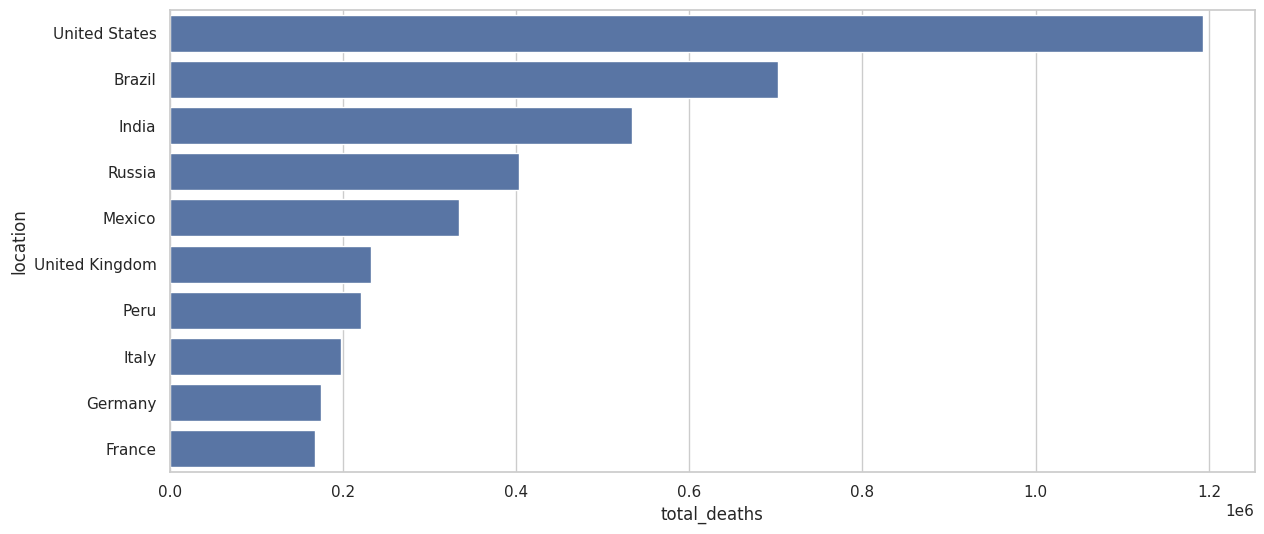

In [18]:
top = covid.sort_values('total_deaths', ascending=False).head(10)
sns.barplot(x='total_deaths', y='location', data=top)

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q3: How does death rate vary by continent?

**Scenario:** You're investigating how well regions managed outcomes.

**Possible Answers:**
- A. Asia has lowest CFR
- B. Europe highest
- C. Africa variable
- D. No difference

<Axes: xlabel='continent', ylabel='case_fatality_rate'>

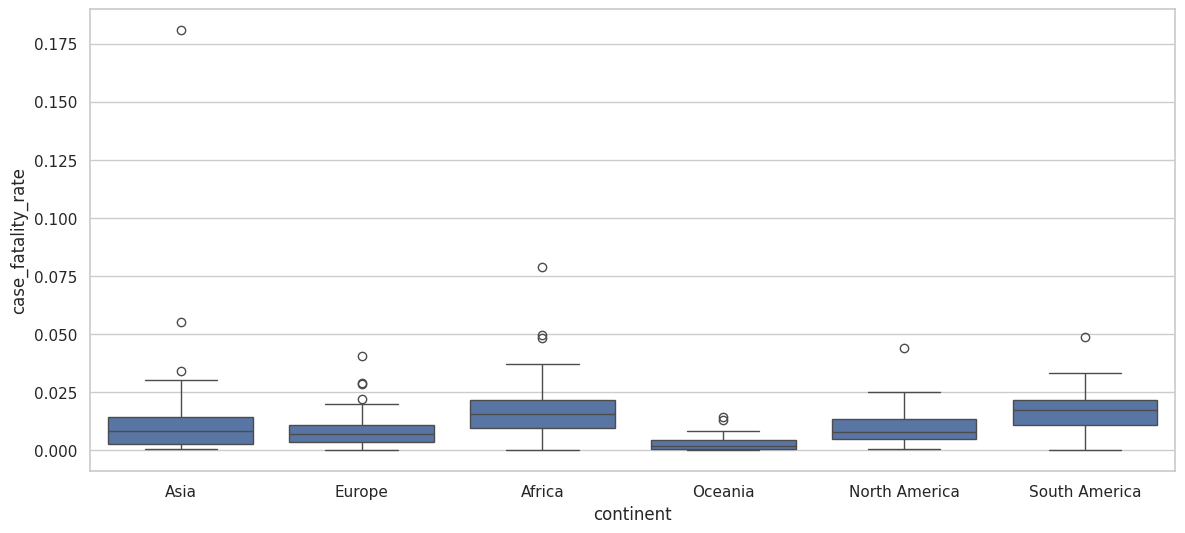

In [19]:
sns.boxplot(x='continent', y='case_fatality_rate', data=covid)

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q4: Are vaccinations evenly distributed globally?

**Scenario:** You want to visualize vaccine inequality.

**Possible Answers:**
- A. Rich countries vaccinated more
- B. Even spread
- C. Africa leads
- D. No clear pattern

<Axes: xlabel='continent', ylabel='people_vaccinated_per_hundred'>

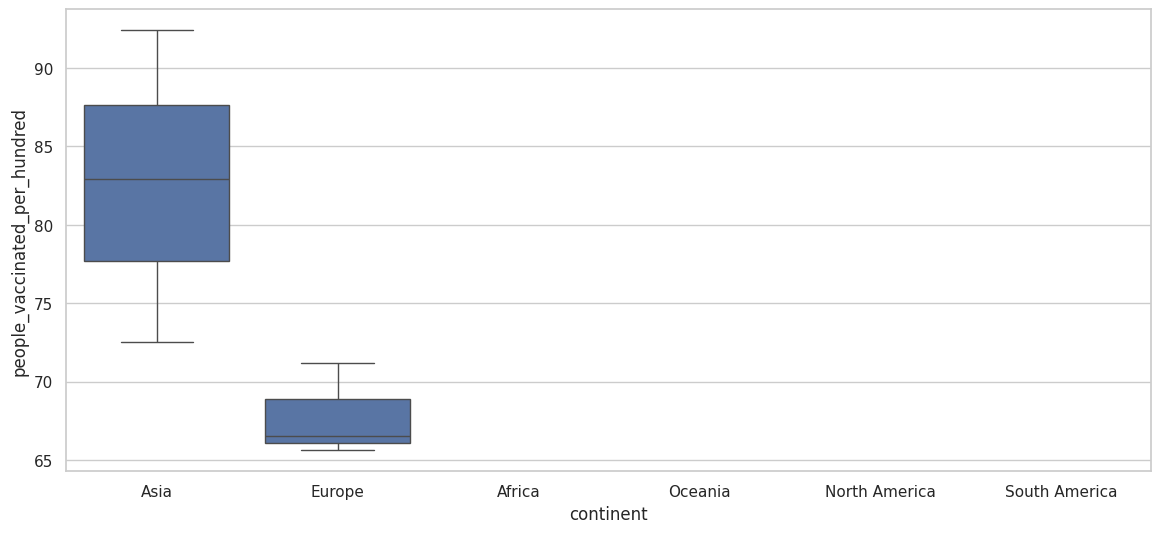

In [20]:
sns.boxplot(x='continent', y='people_vaccinated_per_hundred', data=covid)

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q5: How does GDP relate to vaccination rate?

**Scenario:** You're analyzing economic factors and health equity.

**Possible Answers:**
- A. Higher GDP → more vaccines
- B. No link
- C. Negative correlation
- D. Inverse pattern

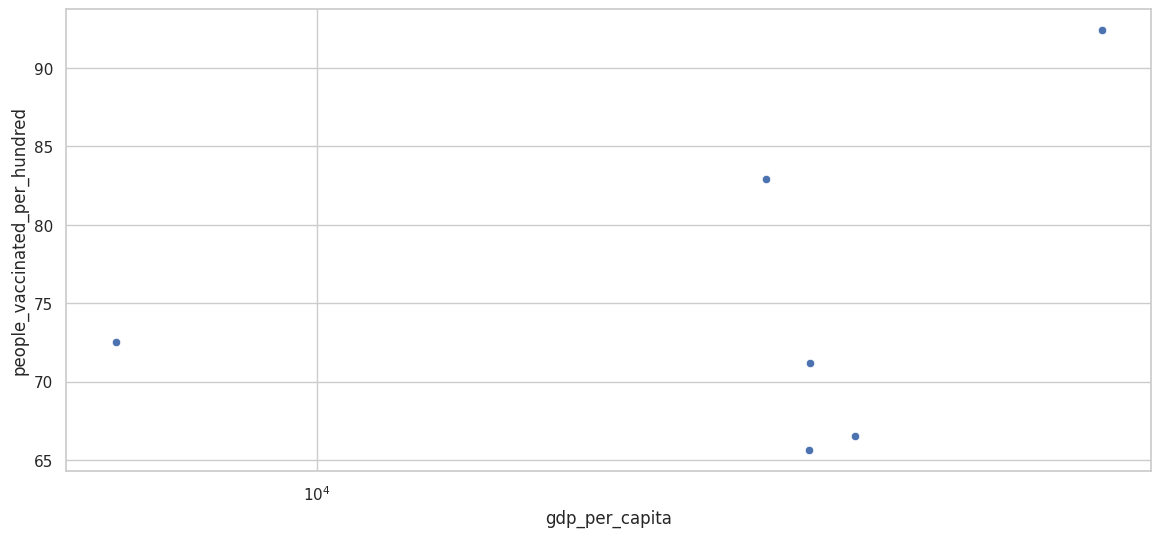

In [21]:
sns.scatterplot(x='gdp_per_capita', y='people_vaccinated_per_hundred', data=covid)
plt.xscale('log')

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q6: Are there outliers in case fatality rate?

**Scenario:** You suspect underreporting or healthcare failure in some countries.

**Possible Answers:**
- A. Yes
- B. No
- C. Need visualization
- D. Can't detect

<Axes: ylabel='case_fatality_rate'>

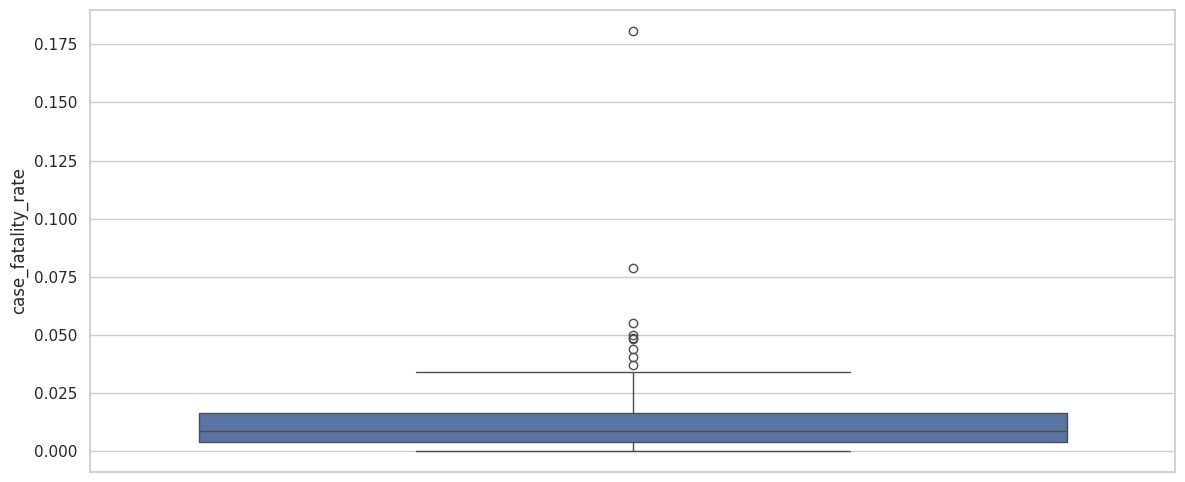

In [22]:
sns.boxplot(y='case_fatality_rate', data=covid)

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q7: How does population affect total cases?

**Scenario:** You're analyzing exposure risk in large countries.

**Possible Answers:**
- A. Positive correlation
- B. No correlation
- C. Inverse
- D. Negative correlation

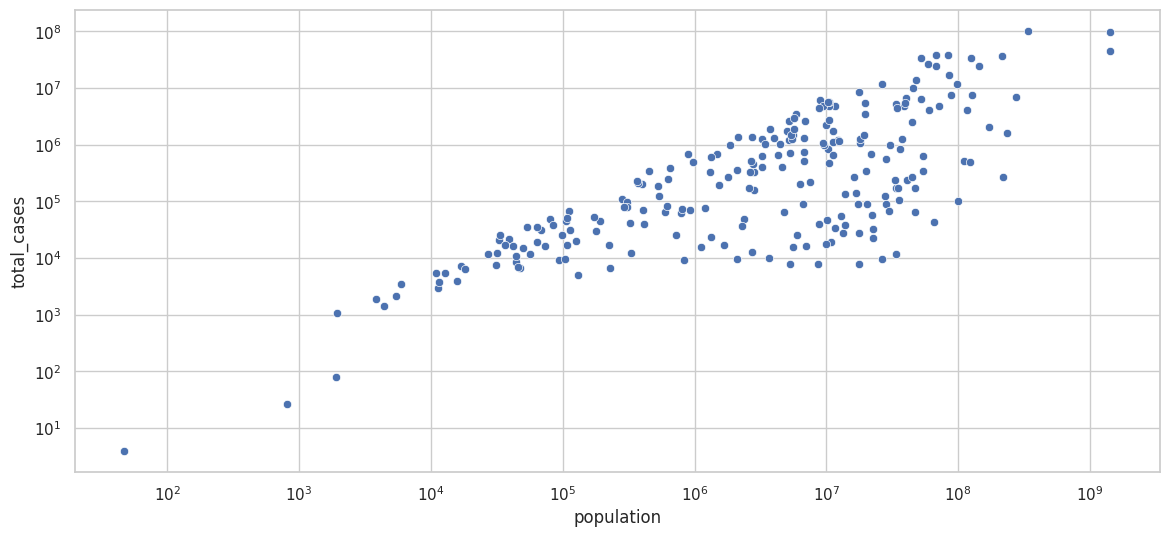

In [23]:
sns.scatterplot(x='population', y='total_cases', data=covid)
plt.xscale('log')
plt.yscale('log')

✅ **What patterns do you see? Discuss below:**

### ❓ COVID Q8: Which countries have high deaths but low cases?

**Scenario:** You're checking for extreme outcomes and poor testing.

**Possible Answers:**
- A. Data entry error
- B. Small nations
- C. Unprepared health systems
- D. Fraud

In [24]:
covid['death_to_case'] = covid['total_deaths'] / covid['total_cases']
covid.sort_values('death_to_case', ascending=False).head(10)[['location', 'death_to_case']]

,location,death_to_case
244,Yemen,0.180745
212,Sudan,0.078852
216,Syria,0.055082
205,Somalia,0.049791
174,Peru,0.048813
63,Egypt,0.048118
141,Mexico,0.043907
28,Bosnia and Herzegovina,0.040608
123,Liberia,0.037074
0,Afghanistan,0.034003


✅ **What patterns do you see? Discuss below:**